In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")

import helper.methods as m

In [120]:
# possible store numbes: 8, 9, 14, 21, 53, 56, 59, 67, 68, 90, 98, 101.
store_number = 101
data = np.genfromtxt(f'../../data/real_data/var/Dominick Data/DATAST{store_number}.csv', delimiter=',', skip_header = 1, dtype = float)

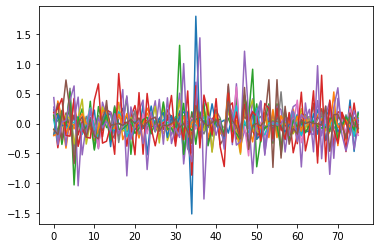

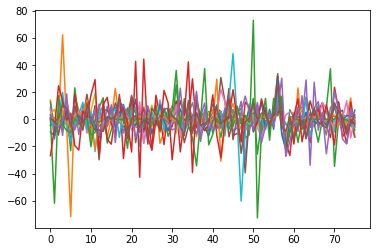

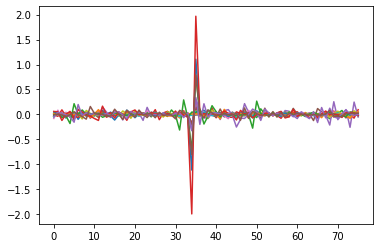

In [121]:
sales = data[:, :16]
plt.plot(sales)
plt.show()

promotions = data[:, 16:32]
plt.plot(promotions)
plt.show()

prices = data[:, -16:]
plt.plot(prices)
plt.show()

In [122]:
X = promotions[:-1]
Y = sales[1:]

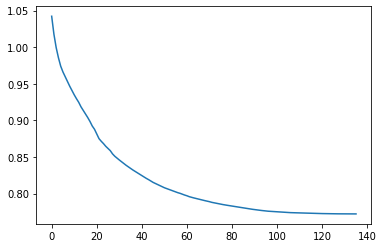

In [123]:
W, Ws, r = m._K_OMP_output(X, Y, F = [], normalize = True)
plt.plot([1 / (75) * np.linalg.norm(Y - X @ W, 'f') ** 2 for W in Ws])

0	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	26	27	28	29	30	31	32	33	34	35	36	37	38	39	40	41	42	43	44	45	46	47	48	49	50	51	52	53	54	55	56	57	58	59	60	61	62	63	64	65	66	67	68	69	70	71	72	73	74	

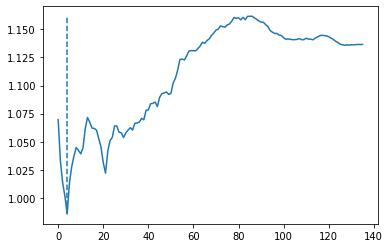

In [124]:
mses = [[] for i in range(len(Ws))]

for t in range(75):
    print(t, end = "\t")
    x_train = np.delete(X, t, axis = 0)
    y_train = np.delete(Y, t, axis = 0)
    
    W, Ws, _ = m._K_OMP_output(x_train, y_train, F = [], normalize = True)
    for j, W in enumerate(Ws):
        mses[j].append(np.linalg.norm(Y[t] - X[t] @ W, 2) ** 2)
    

mses_avg = [sum(mse) / len(mse) for mse in mses]
# plt.plot(X)
# plt.show()
plt.vlines(np.argmin(mses_avg), min(mses_avg), max(mses_avg), linestyle = '--')
plt.plot(mses_avg)
# h.score(X, m._constrained_OLS(X, Ws[np.argmin(mses_avg)] != 0), W_true);

In [125]:
B_LOOCV_2 = Ws[np.argmin(mses_avg)] != 0
print(np.round(B_LOOCV_2))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [126]:
import networkx as nx

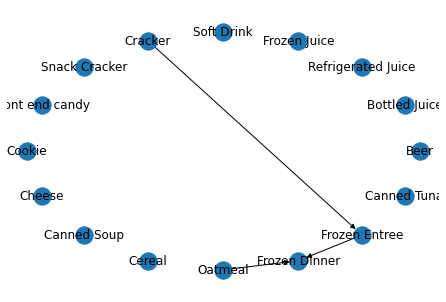

In [127]:
G = nx.from_numpy_matrix(B_LOOCV_2, create_using=nx.DiGraph)

mapping = {0:  "Beer",       1: "Bottled Juice",  2: "Refrigerated Juice", 3: "Frozen Juice", 
           4:  "Soft Drink", 5: "Cracker",        6: "Snack Cracker",      7: "Front end candy",
           8:  "Cookie",     9: "Cheese",        10: "Canned Soup",       11: "Cereal", 
           12: "Oatmeal",   13: "Frozen Dinner", 14: "Frozen Entree",     15: "Canned Tuna"
          }

G = nx.relabel_nodes(G, mapping)
nx.draw(G, pos = nx.circular_layout(G), with_labels = True)
# nx.draw(G, pos = nx.circular_layout(G), with_labels = True)
# nx.draw(G, pos = nx.kamada_kawai_layout(G), with_labels = True)